# Topic Modeling

In [1]:
import Topic_modeling

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,15)

import pandas as pd

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer

OMP_NUM_THREADS=1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
everything = Topic_modeling.Topic_modeling('Excels/everything.xls', 'everything')
adv_disav_def = Topic_modeling.Topic_modeling('Excels/adv_disav_def.xls', 'adv_disav_def')
ansible = Topic_modeling.Topic_modeling('Excels/ansible.xls', 'ansible')
bad_practices = Topic_modeling.Topic_modeling('Excels/bad_practices.xls', 'bad_practices')
best_practices = Topic_modeling.Topic_modeling('Excels/best_practices.xls', 'best_practices')
chef = Topic_modeling.Topic_modeling('Excels/chef.xls', 'chef')
puppet = Topic_modeling.Topic_modeling('Excels/puppet.xls', 'puppet')

Checking topics 2
Score: 0.24227412539952972
Checking topics 4
Score: 0.24439607949986808
Checking topics 6
Score: 0.2841100863506851
Checking topics 8
Score: 0.2945661352843109
Checking topics 10
Score: 0.32285475303437344
Checking topics 12
Score: 0.3067758154407723
Checking topics 14
Score: 0.3026708139680598
Checking topics 16
Score: 0.3229526010398448
Checking topics 18
Score: 0.3057408223221563
Checking topics 20
Score: 0.31089689546548244
Checking topics 22
Score: 0.33252052373945695
Checking topics 24
Score: 0.3342321782024884
Checking topics 26
Score: 0.3119098440379069
Checking topics 28
Score: 0.34250329068063284


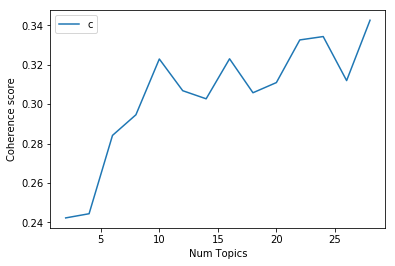

The best model has 28 topics


In [3]:
everything.modeling()

In [ ]:
everything.save_html_lda()

In [ ]:
puppet.modelling(10)


Coherence Score:  0.33401992167032807


# Topological Analysis

### Creating word2vec model and transform the words into vectors

In [62]:
data = everything.data_lemmatized
model = Word2Vec(data, min_count=1)
X = model[model.wv.vocab]

C:\Users\angel\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


### PCA for visualization purposes of word2vec in a 2D space

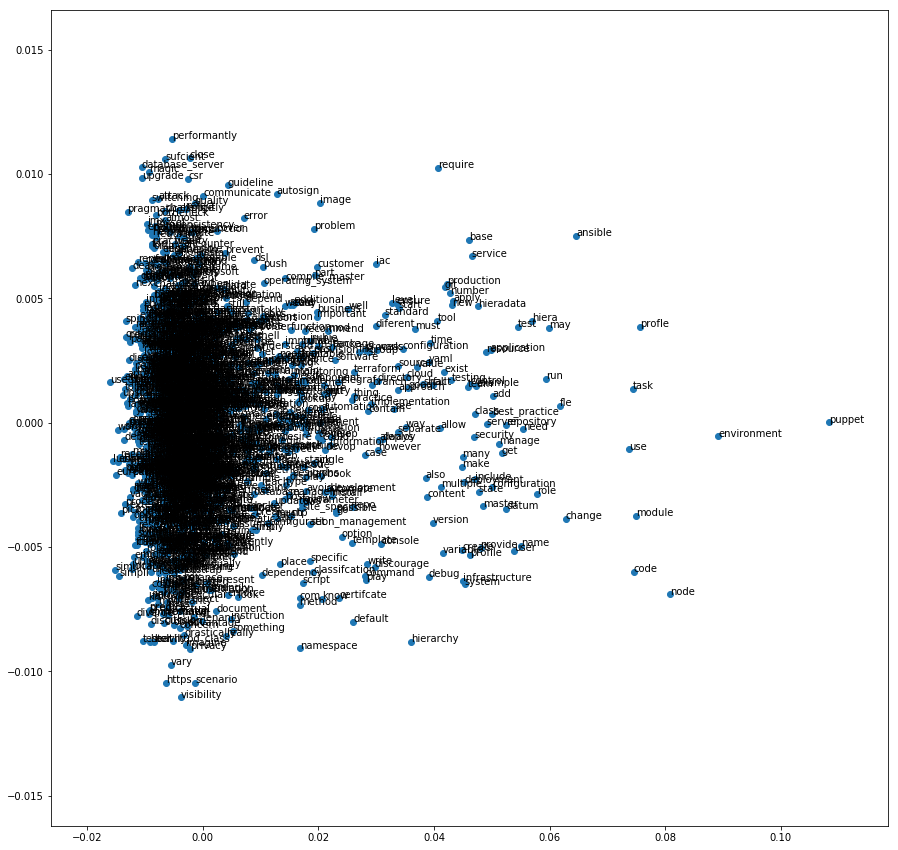

In [63]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

### TSNE for visualization purposes of word2vec in a 2D space

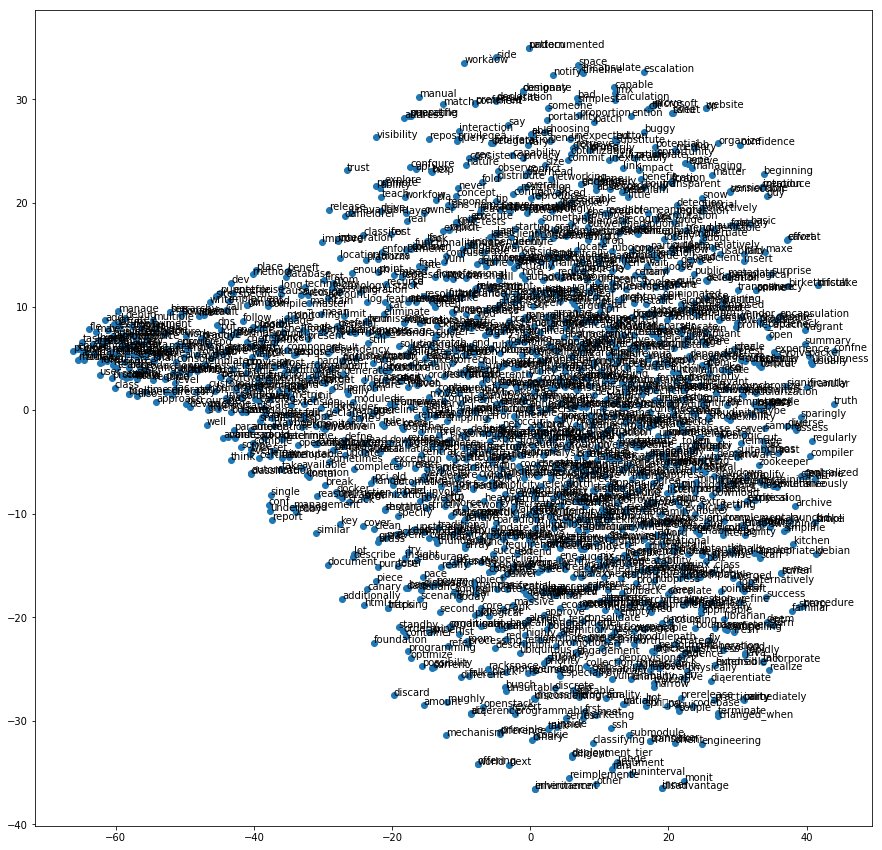

In [67]:
tsne = TSNE(n_components=2, perplexity=30)
result = tsne.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

#### 3D Visualization of word2vec using TSNE

NameError: name 'cm' is not defined

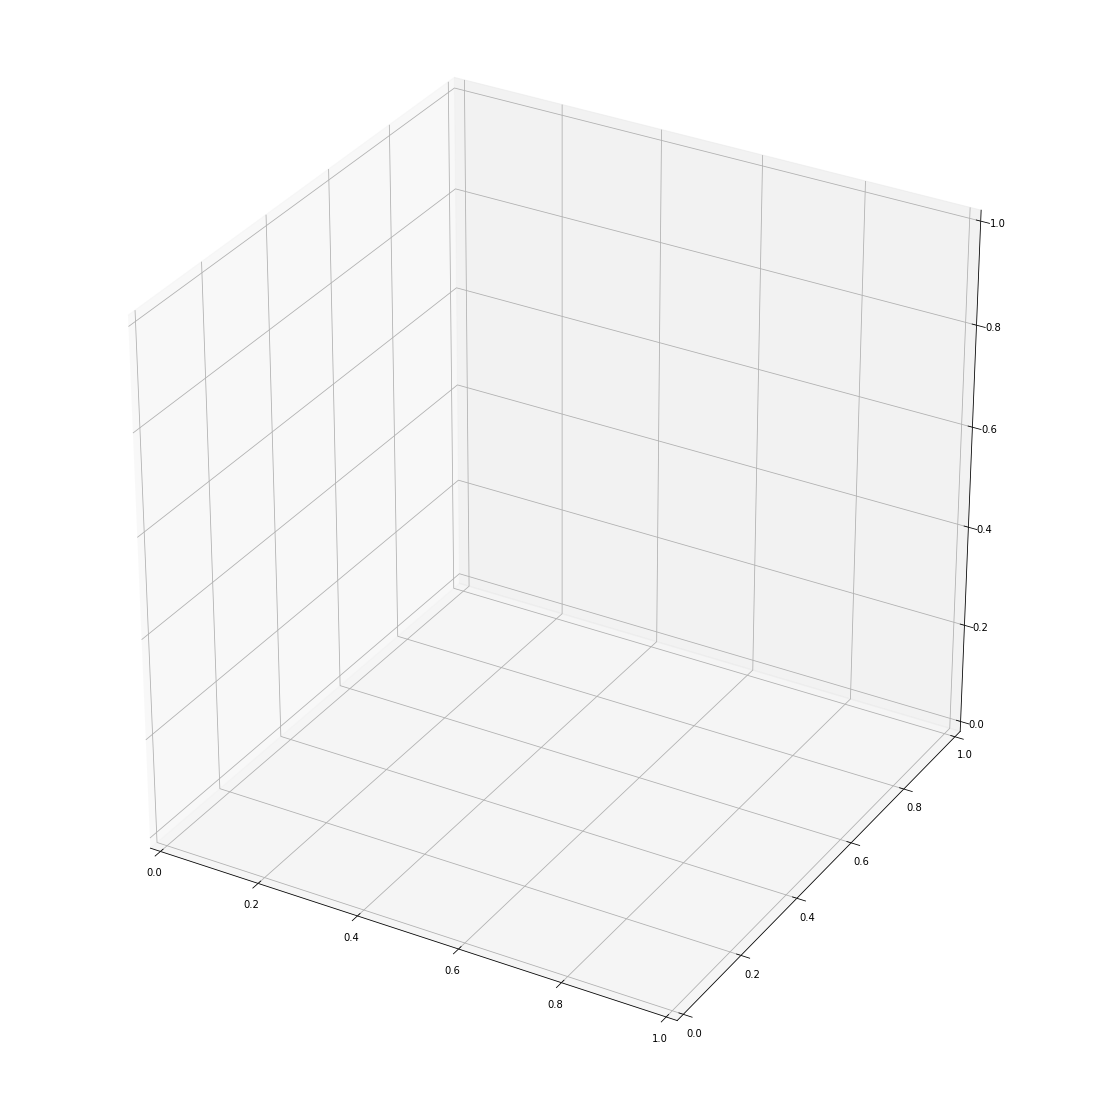

In [69]:
tsne = TSNE(n_components=3, perplexity=30)
result = tsne.fit_transform(X)

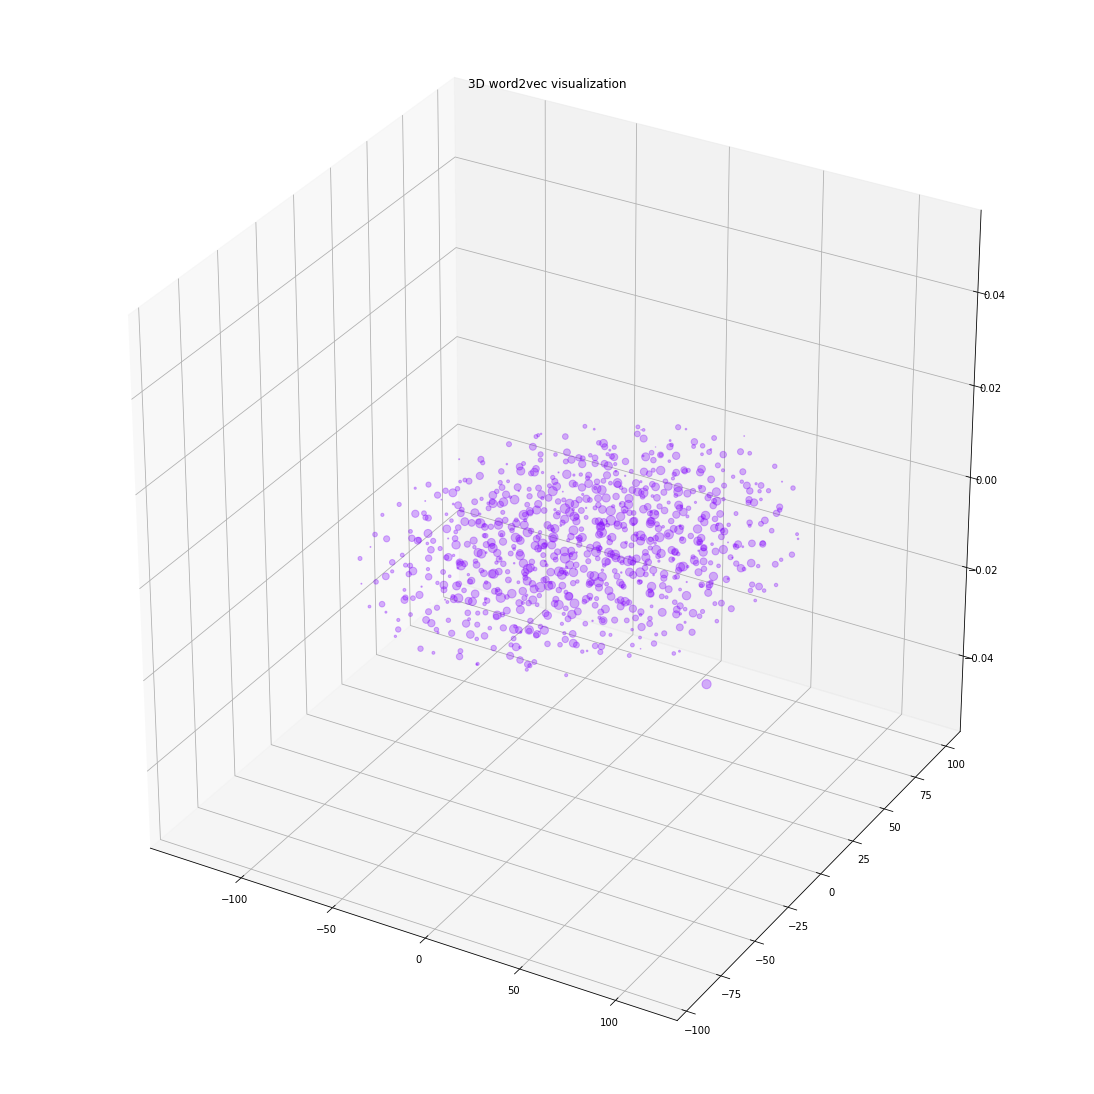

In [76]:

fig = plt.figure()
ax = Axes3D(fig)
colors = cm.rainbow(np.linspace(0, 1, 1))
plt.scatter(result[:, 0], result[:, 1], result[:, 2], c=colors, alpha=0.3)
plt.title('3D word2vec visualization')
plt.show()

### Using kmapper to create a 2D topology based on the word2vec extraction

#### On word2vec

In [66]:
# Import the class
import kmapper as km
from sklearn import cluster

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(X, projection=[0,1]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, X, clusterer=cluster.AgglomerativeClustering(n_clusters=3,
                                                             linkage="complete",
                                                             affinity="cosine"),
                   overlap_perc=0.33)

# Visualize it
mapper.visualize(graph, path_html="Visualizations/word2vec_top_analysis.html", X =X, X_names = words,
                 title="Topological analysis word2vec");

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0, 1]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (1729, 100)

..Projecting data using: [0, 1]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (1729, 100) using lens shaped (1729, 2)

Creating 100 hypercubes.

Created 969 edges and 177 nodes in 0:00:00.123663.
Wrote visualization to: Visualizations/word2vec_top_analysis.html
